4.10.3 Grouped Profiling Analysis

## Outline

1. Outline

2. Import

3. Profiling Exploration

    3.1  Variables to Profile Options

    3.2  Grouping POC by user_id¶

4. Export; import

5.  Continuing the Clustering

6.  Analyzing the Clusters¶

7. Export

## Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
poc = pd.read_pickle ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/poc.pkl')

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Profiling Exploration

### Variables to Profile Options

In [5]:
poc.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days_2', 'order_amount', 'loyalty_flag', 'spend_flag',
       'order_freq', 'order_freq_flag', 'first_name', 'last_name', 'gender',
       'state', 'age', 'n_dependants', 'martial_status', 'income'],
      dtype='object')

In [6]:
#Specfied from Company

#age
#income
#certain goods in the “department_id” column
#number of dependents 
#orders_day_of_the_week
#order_hour_of_day

In [7]:
#Standout to Me

#order_dow
#order_amount
#loyalty_flag
#order_freq
#martial_status


### Grouping POC by user_id

In [8]:
gro = poc.groupby('user_id').mean('income')

In [9]:
gro.head(3)

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,aisle_id,department_id,prices,order_freq,age,n_dependants,income
user_id,,,,,,,,,,,,,,
1,1.962396e+06,5.813559,2.644068,10.542373,20.259259,17885.966102,0.694915,61.525424,14.000000,6.367797,20.5,31.0,3.0,40423.0
2,1.757602e+06,8.035897,2.005128,10.441026,15.967033,25398.015385,0.476923,69.041026,12.600000,7.515897,13.0,68.0,3.0,64940.0
3,1.872658e+06,6.000000,1.011364,16.352273,11.487179,27459.238636,0.625000,68.340909,9.443182,8.197727,10.0,33.0,3.0,93240.0


In [10]:
gro.shape

(194950, 14)

In [11]:
gro.size

2729300

In [12]:
gro.dtypes

order_id                  float64
order_number              float64
order_dow                 float64
order_hour_of_day         float64
days_since_prior_order    float64
product_id                float64
reordered                 float64
aisle_id                  float64
department_id             float64
prices                    float64
order_freq                float64
age                       float64
n_dependants              float64
income                    float64
dtype: object

## Export; import

In [13]:
#we must do this so it is not a layer!

In [14]:
gro.to_pickle('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/gro.pkl')

In [15]:
gro_df = pd.read_pickle('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/cds.pkl')

In [16]:
gro_df.head(2)

,user_id,first_name,last_name,gender,state,age,n_dependants,martial_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285


In [17]:
gro_df.dtypes

user_id            int64
first_name        object
last_name         object
gender            object
state             object
age                int64
n_dependants       int64
martial_status    object
income             int64
dtype: object

<AxesSubplot:ylabel='Frequency'>

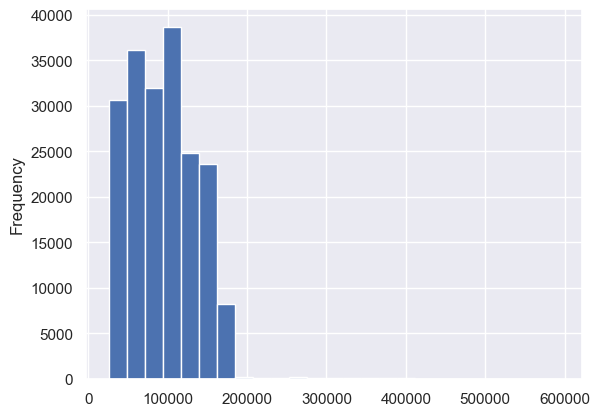

In [18]:
gro_df['income'].plot.hist(bins = 25)

## Continuing the Clustering

In [1]:
#Conducting K Mean Clustering with income & age

In [20]:
gro_df.columns.get_loc('user_id') 

0

In [21]:
x = gro_df.iloc[:,[0, 8]]

In [22]:
means = KMeans(n_clusters=3)

In [23]:
kmeans = KMeans(3)
means.fit(x)


KMeans(n_clusters=3)

In [24]:
#part 2

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 2, 2, ..., 1, 2, 2], dtype=int32)

In [26]:
data_with_clusters = gro_df.copy()
data_with_clusters['Clusters'] = identified_clusters 

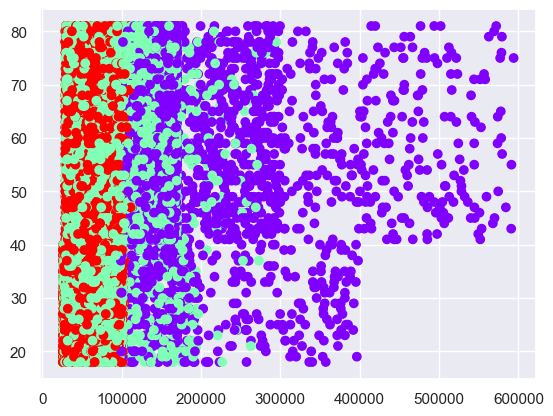

In [27]:
pic = plt.scatter(data_with_clusters['income'],data_with_clusters['age'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [28]:
gro_df['user_id'].max()

206209

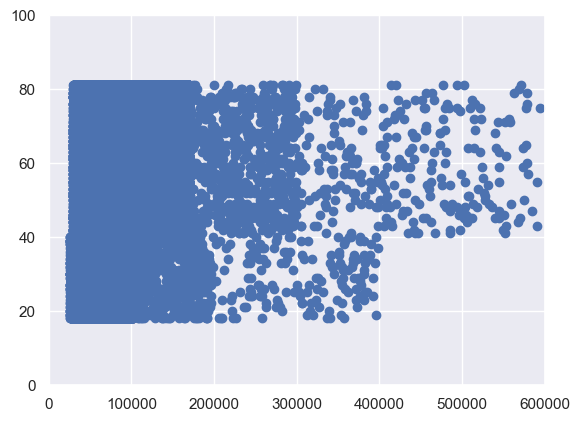

In [29]:
#for comparisent
plt.scatter(gro_df['income'],gro_df['age'])
plt.xlim(0,600000)
plt.ylim(0,100)
plt.show()

In [30]:
#part 3

In [31]:
identified_clusters

array([0, 2, 2, ..., 1, 2, 2], dtype=int32)

Text(0, 0.5, 'WCSS')

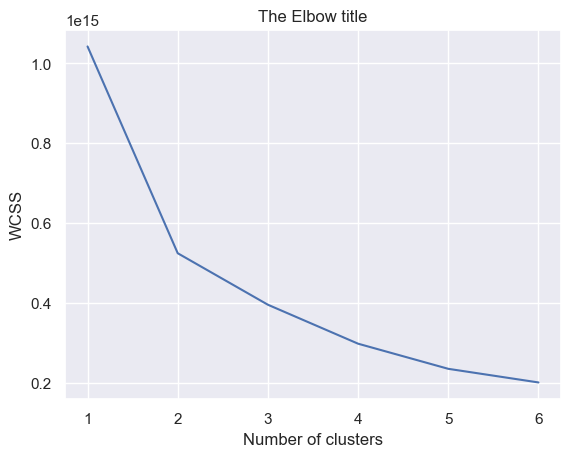

In [32]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


## Analyzing the Clusters

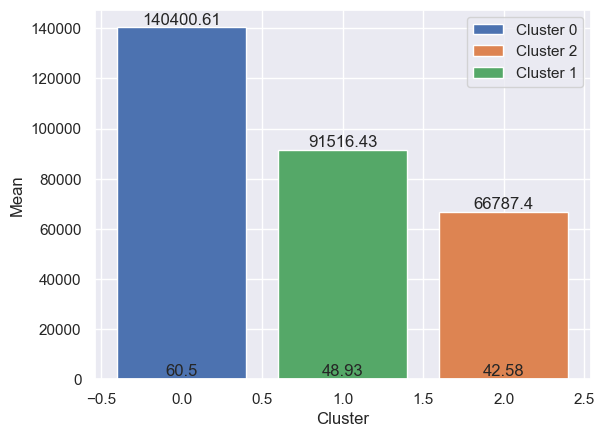

In [36]:
for cluster in data_with_clusters['Clusters'].unique():
    # Filter the data for the current cluster
    cluster_data = data_with_clusters[data_with_clusters['Clusters'] == cluster]
    # Calculate the mean of 'income' and 'age' for the current cluster
    cluster_income_mean = cluster_data['income'].mean()
    cluster_age_mean = cluster_data['age'].mean()
    # Create a bar chart with 'income' and 'age' as the x and y axis, respectively
    plt.bar(cluster, [cluster_income_mean, cluster_age_mean], label='Cluster {}'.format(cluster))
    # Add labels to the bars
    plt.text(cluster, cluster_income_mean, round(cluster_income_mean, 2), ha='center', va='bottom')
    plt.text(cluster, cluster_age_mean, round(cluster_age_mean, 2), ha='center', va='bottom')
    
plt.xlabel('Cluster')
plt.ylabel('Mean')
plt.legend()
plt.show()


In [37]:
#asigning segment to user_id
gro_df['Segment'] = data_with_clusters['Clusters']

In [38]:
gro_df.head(2)

,user_id,first_name,last_name,gender,state,age,n_dependants,martial_status,income,Segment
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,0
1,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285,2


## Export

In [41]:
#Grouped Poc DF by UserID; pickle
gro_df.to_pickle('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/segmented_data.pkl', )